#Proyek Analisis Data: Bike Sharing Dataset



Nama: Zhafirah Izzatulrahmah Putri

Email: m200d4kx1682@bangkit.academy

ID Dicoding: zhafirahip

#Menentukan Pertanyaan Bisnis


*   Pertanyaan 1: What is the relationship between weather and the number of daily bicycle rentals?
*   Pertanyaan 2: What is the relationship between average bicycle rentals based on weather and the number of bicycle rentals in a day?

#Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#Data Wrangling

##Gathering data

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
day_df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/day.csv')
day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [4]:
hour_df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/hour.csv')
hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [5]:
day_df.rename(columns={'dteday':'date','yr':'year','mnth':'month',
                   'weathersit':'weather_situation','atemp':'temp_feel',
                   'hum':'humidity','windspeed':'wind_speed','cnt':'count'},inplace=True)

hour_df.rename(columns={'dteday':'date','yr':'year','mnth':'month',
                   'weathersit':'weather_situation','atemp':'temp_feel',
                   'hum':'humidity','windspeed':'wind_speed','cnt':'count'},inplace=True)
day_df.head()
hour_df.head()

,instant,date,season,year,month,hr,holiday,weekday,workingday,weather_situation,temp,temp_feel,humidity,wind_speed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [6]:
data= day_df.merge(hour_df, on='date', how='inner', suffixes=('_daily', '_hourly'))
print(data.shape)
data.loc[data["date"].isnull()]
data.head()

(17379, 32)


,instant_daily,date,season_daily,year_daily,month_daily,holiday_daily,weekday_daily,workingday_daily,weather_situation_daily,temp_daily,...,weekday_hourly,workingday_hourly,weather_situation_hourly,temp_hourly,temp_feel_hourly,humidity_hourly,wind_speed_hourly,casual_hourly,registered_hourly,count_hourly
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


##Assessing data

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 17378
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   instant_daily             17379 non-null  int64  
 1   date                      17379 non-null  object 
 2   season_daily              17379 non-null  int64  
 3   year_daily                17379 non-null  int64  
 4   month_daily               17379 non-null  int64  
 5   holiday_daily             17379 non-null  int64  
 6   weekday_daily             17379 non-null  int64  
 7   workingday_daily          17379 non-null  int64  
 8   weather_situation_daily   17379 non-null  int64  
 9   temp_daily                17379 non-null  float64
 10  temp_feel_daily           17379 non-null  float64
 11  humidity_daily            17379 non-null  float64
 12  wind_speed_daily          17379 non-null  float64
 13  casual_daily              17379 non-null  int64  
 14  regist

In [8]:
data.isna().sum()

instant_daily               0
date                        0
season_daily                0
year_daily                  0
month_daily                 0
holiday_daily               0
weekday_daily               0
workingday_daily            0
weather_situation_daily     0
temp_daily                  0
temp_feel_daily             0
humidity_daily              0
wind_speed_daily            0
casual_daily                0
registered_daily            0
count_daily                 0
instant_hourly              0
season_hourly               0
year_hourly                 0
month_hourly                0
hr                          0
holiday_hourly              0
weekday_hourly              0
workingday_hourly           0
weather_situation_hourly    0
temp_hourly                 0
temp_feel_hourly            0
humidity_hourly             0
wind_speed_hourly           0
casual_hourly               0
registered_hourly           0
count_hourly                0
dtype: int64

there is no missing value

In [9]:
data.nunique()

instant_daily                 731
date                          731
season_daily                    4
year_daily                      2
month_daily                    12
holiday_daily                   2
weekday_daily                   7
workingday_daily                2
weather_situation_daily         3
temp_daily                    499
temp_feel_daily               690
humidity_daily                595
wind_speed_daily              650
casual_daily                  606
registered_daily              679
count_daily                   696
instant_hourly              17379
season_hourly                   4
year_hourly                     2
month_hourly                   12
hr                             24
holiday_hourly                  2
weekday_hourly                  7
workingday_hourly               2
weather_situation_hourly        4
temp_hourly                    50
temp_feel_hourly               65
humidity_hourly                89
wind_speed_hourly              30
casual_hourly 

##Cleaning data


In [10]:
print("Number of duplications: ", data.duplicated().sum())
data.describe()

Number of duplications:  0


,instant_daily,season_daily,year_daily,month_daily,holiday_daily,weekday_daily,workingday_daily,weather_situation_daily,temp_daily,temp_feel_daily,...,weekday_hourly,workingday_hourly,weather_situation_hourly,temp_hourly,temp_feel_hourly,humidity_hourly,wind_speed_hourly,casual_hourly,registered_hourly,count_hourly
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,367.172622,2.501640,0.502561,6.537775,0.028770,3.003683,0.682721,1.391680,0.496987,0.475775,...,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,210.072051,1.106918,0.500008,3.438776,0.167165,2.005771,0.465431,0.540501,0.182445,0.162426,...,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,...,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,185.000000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.338363,...,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,367.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.502500,0.490122,...,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,549.000000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655833,0.610488,...,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,...,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Because there are no duplicates and missing values, there is no need to clean

#Explanatory Data Analysis (EDA)

In [11]:
new_df = data.copy()

In [12]:
datetime_columns = ["date"]

for column in datetime_columns:
  new_df[column] = pd.to_datetime(new_df[column])

In [13]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 17378
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   instant_daily             17379 non-null  int64         
 1   date                      17379 non-null  datetime64[ns]
 2   season_daily              17379 non-null  int64         
 3   year_daily                17379 non-null  int64         
 4   month_daily               17379 non-null  int64         
 5   holiday_daily             17379 non-null  int64         
 6   weekday_daily             17379 non-null  int64         
 7   workingday_daily          17379 non-null  int64         
 8   weather_situation_daily   17379 non-null  int64         
 9   temp_daily                17379 non-null  float64       
 10  temp_feel_daily           17379 non-null  float64       
 11  humidity_daily            17379 non-null  float64       
 12  wind_speed_daily  

In [14]:
season_labels = {
    1:'spring',
    2:'summer',
    3:'fall',
    4:'winter'
}
new_df['season_daily'] = new_df['season_daily'].map(season_labels)
new_df['season_hourly'] = new_df['season_hourly'].map(season_labels)

year_labels = {
    0:"2017",
    1:"2018",
}
new_df['year_daily'] = new_df['year_daily'].map(year_labels)
new_df['year_hourly'] = new_df['year_hourly'].map(year_labels)

month_labels = {
    1:'Jan',
    2:'Feb',
    3:'Mar',
    4:'Apr',
    5:'May',
    6:'June',
    7:'July',
    8:'Aug',
    9:'Sep',
    10:'Oct',
    11:'Nov',
    12:'Dec'
}
new_df['month_daily'] = new_df['month_daily'].map(month_labels)
new_df['month_hourly'] = new_df['month_hourly'].map(month_labels)

weekday_labels = {
    0: 'Sunday',
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday'
}
new_df['weekday_hourly'] = new_df['weekday_hourly'].map(weekday_labels)
new_df['weekday_daily'] = new_df['weekday_daily'].map(weekday_labels)

weather_labels = {
    1: 'Clear',
    2: 'Mist',
    3: 'Heavy Rain'
}

new_df['weather_situation_daily'] = new_df['weather_situation_daily'].map(weather_labels)
new_df['weather_situation_hourly'] = new_df['weather_situation_hourly'].map(weather_labels)

holiday_labels = {
    0: 'No',
    1: 'Yes'
}
new_df['holiday_daily'] = new_df['holiday_daily'].map(holiday_labels)
new_df['holiday_hourly'] = new_df['holiday_hourly'].map(holiday_labels)

workingday_labels = {
    0: 'No',
    1: 'Yes'
}
new_df['workingday_daily'] = new_df['workingday_daily'].map(workingday_labels)
new_df['workingday_hourly'] = new_df['workingday_hourly'].map(workingday_labels)


In [15]:
new_df.season_daily.value_counts()

fall      4496
summer    4409
spring    4242
winter    4232
Name: season_daily, dtype: int64

In [16]:
new_df.year_daily.value_counts()

2018    8734
2017    8645
Name: year_daily, dtype: int64

In [17]:
new_df.month_daily.value_counts()

May     1488
July    1488
Dec     1483
Aug     1475
Mar     1473
Oct     1451
June    1440
Apr     1437
Sep     1437
Nov     1437
Jan     1429
Feb     1341
Name: month_daily, dtype: int64

In [18]:
new_df.weekday_hourly.value_counts()

Saturday     2512
Sunday       2502
Friday       2487
Monday       2479
Wednesday    2475
Thursday     2471
Tuesday      2453
Name: weekday_hourly, dtype: int64

In [19]:
new_df.weather_situation_daily.value_counts()

Clear         11040
Mist           5871
Heavy Rain      468
Name: weather_situation_daily, dtype: int64

In [20]:
new_df.head()

,instant_daily,date,season_daily,year_daily,month_daily,holiday_daily,weekday_daily,workingday_daily,weather_situation_daily,temp_daily,...,weekday_hourly,workingday_hourly,weather_situation_hourly,temp_hourly,temp_feel_hourly,humidity_hourly,wind_speed_hourly,casual_hourly,registered_hourly,count_hourly
0,1,2011-01-01,spring,2017,Jan,No,Saturday,No,Mist,0.344167,...,Saturday,No,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,1,2011-01-01,spring,2017,Jan,No,Saturday,No,Mist,0.344167,...,Saturday,No,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,1,2011-01-01,spring,2017,Jan,No,Saturday,No,Mist,0.344167,...,Saturday,No,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,1,2011-01-01,spring,2017,Jan,No,Saturday,No,Mist,0.344167,...,Saturday,No,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,1,2011-01-01,spring,2017,Jan,No,Saturday,No,Mist,0.344167,...,Saturday,No,Clear,0.24,0.2879,0.75,0.0,0,1,1


#Visualization & Explanatory Analysis

##1: What is the relationship between weather and the number of daily bicycle rentals?


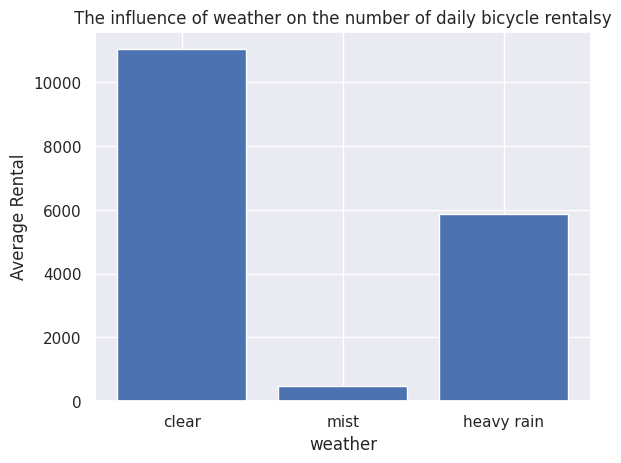

In [21]:
data = {
    'weather_situation_daily': ['clear', 'mist', 'heavy rain'],
    'count_daily': [11040, 5871, 468]
}
new_df = pd.DataFrame(data)
seasonal_data = new_df.groupby('weather_situation_daily')['count_daily'].mean()
season_names = ['clear', 'mist', 'heavy rain']
plt.bar(season_names, seasonal_data)
plt.title('The influence of weather on the number of daily bicycle rentalsy')
plt.xlabel('weather')
plt.ylabel('Average Rental')
plt.show()

The highest number of bicycle renters can be seen when the weather is clear and the lowest when the weather is mist

##2: What is the relationship between average bicycle rentals based on weather and the number of bicycle rentals in a day?

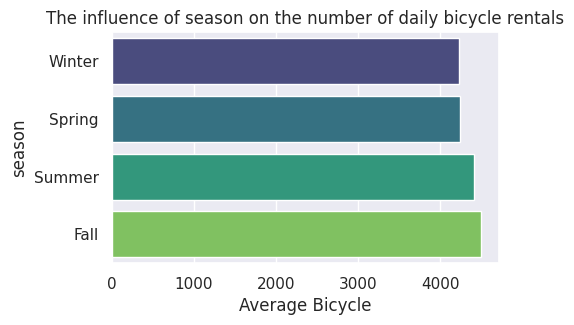

In [27]:
data = {
    'season_daily': ['Spring', 'Winter', 'Summer', 'Fall'],
    'count_daily': [4242, 4232, 4409, 4496]
}

new_df = pd.DataFrame(data)

avg_weather = new_df.groupby('season_daily')['count_daily'].mean().reset_index().sort_values("count_daily")

plt.figure(figsize=(5, 3))
sns.barplot(x='count_daily', y='season_daily', data=avg_weather, hue='season_daily', palette='viridis', legend=False)

plt.title('The influence of season on the number of daily bicycle rentals')
plt.xlabel('Average Bicycle')
plt.ylabel('season')

plt.show()

Based on the graph, it can be seen that in the fall the number of bicycle renters is the highest and the least in the spring.